# Webscraping the Questions & Tags from `Stack exchange`

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

## Webscraping Questions

### Required Pages:
https://astronomy.stackexchange.com/questions?tab=newest&pagesize=50  
https://astronomy.stackexchange.com/questions?tab=newest&page=2  
.  
.  
.  
.  
https://astronomy.stackexchange.com/questions?tab=newest&page=195  

In [5]:
pages=[]
pages.append("https://astronomy.stackexchange.com/questions?tab=newest&pagesize=50")

for i in list(range(2, 196)):
  pages.append('https://astronomy.stackexchange.com/questions?tab=newest&page='+str(i))


#pages

In [6]:
Questions=[]

for i in pages:
  page = requests.get(i)
  soup = BeautifulSoup(page.text, 'html.parser')

  question_name_list = soup.find_all('h3')
  for question in question_name_list:
    if question.find('a'):
      Questions.append(question.find('a').text)

Questions=Questions[2:]
#print(Questions)



In [8]:
len(Questions)

10127

In [25]:
Questions[0] #first question

'SDSS - getting separate u, g, r, i, z frames from SWARP tool and astropy'

In [26]:
Questions[-1] #last question

'How do I calculate the inclination of an object with an amateur telescope?'

## Webscraping Tags

In [20]:
import re
from bs4 import BeautifulSoup

In [21]:
def listToString(s):
  # initialize an empty string 
  str1 = ""  
    
  # traverse in the string   
  for ele in s:  
      str1 += ele   
    
  # return string   
  return str1 


tag=[]

for i in pages:
  page = requests.get(i)
  soup = BeautifulSoup(page.text, 'html.parser')

  Tags=[]

  for div in soup.find_all('div', {"class": re.compile("^tags")}):      
    Tags.append(div.get('class')[1:])



  tagss=[]

  for j in Tags:
    tagss.append(listToString(j).replace('t-','|'))



  for k in tagss:
    tag.append(k[1:])
#tag

In [22]:
len(tag)

9739

In [23]:
tag[0]

'galaxy-center|astropy|sloan-dss'

In [24]:
tag[-1]

'inclination|amateur-observing'

In [27]:
df = pd.DataFrame(list(zip(tag, Questions)), columns =['Tags', 'Questions']) 
df.head() 

,Tags,Questions
0,galaxy-center|astropy|sloan-dss,"SDSS - getting separate u, g, r, i, z frames f..."
1,mercury|volcanism,What is preventing cave formation on Mercury?
2,star|the-sun|brown-dwarf|stellar-atmospheres,Can lightning occur in stars like the Sun?
3,orbit,What shape do satellites trace as they wobble ...
4,gas-giants|astrobiology,Updrafts on Gas Giants


In [28]:
df.shape

(9739, 2)

# Wordcloud for `Tags`

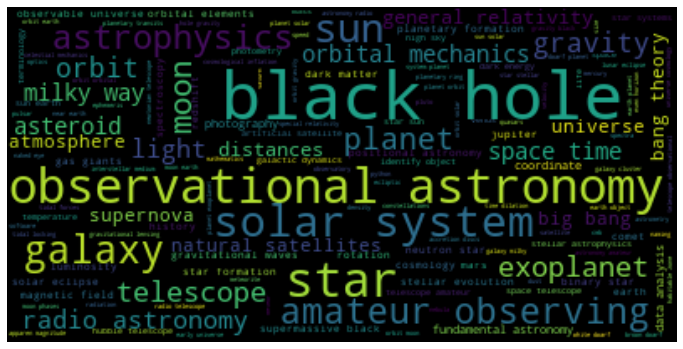

In [29]:
# get a list of the words in all Types, initialise a dictionary to zero values for each word
vocab = []
for Tags in df['Tags']:
    vocab.append(Tags)

vocab=', '.join(vocab)
#print(vocab)




from wordcloud import WordCloud 

# Start with one review:
text = vocab

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.subplots(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Making label column as per requirement for input to the fasttext module.

In [30]:
df["Tags"] = [item.replace("|", " __label__") for item in df["Tags"]]
df['Tags'] ='__label__' + df['Tags'].astype(str)

#columns_titles = ["Tags","Questions"]
#df=df.reindex(columns=columns_titles)

df.head()

,Tags,Questions
0,__label__galaxy-center __label__astropy __labe...,"SDSS - getting separate u, g, r, i, z frames f..."
1,__label__mercury __label__volcanism,What is preventing cave formation on Mercury?
2,__label__star __label__the-sun __label__brown-...,Can lightning occur in stars like the Sun?
3,__label__orbit,What shape do satellites trace as they wobble ...
4,__label__gas-giants __label__astrobiology,Updrafts on Gas Giants


In [31]:
df['Tags'][0]

'__label__galaxy-center __label__astropy __label__sloan-dss'

In [32]:
df['Questions'][0]

'SDSS - getting separate u, g, r, i, z frames from SWARP tool and astropy'

In [33]:
df.shape

(9739, 2)

In [34]:
len(df)

9739

# Dataframe to `.txt` file

In [35]:
f= open("astronomy_n.txt","w+") #open the file for writing
f.close() #finally closing the file 

In [36]:
df.to_csv(r'astronomy_n.txt', header=None, index=None, sep=' ', mode='a')

In [37]:
with open('astronomy_n.txt', 'r') as f, open('astronomy.txt', 'w') as fo:
    for line in f:
        fo.write(line.replace('"', '').replace("'", ""))

# Applying FastText on `astronomy.txt` file

In [38]:
!head astronomy.txt

__label__galaxy-center __label__astropy __label__sloan-dss SDSS - getting separate u, g, r, i, z frames from SWARP tool and astropy
__label__mercury __label__volcanism What is preventing cave formation on Mercury?
__label__star __label__the-sun __label__brown-dwarf __label__stellar-atmospheres Can lightning occur in stars like the Sun?
__label__orbit What shape do satellites trace as they wobble in orbit around another body?
__label__gas-giants __label__astrobiology Updrafts on Gas Giants
__label__white-dwarf How bright would a magically created 13.7B years ago white dwarf be now?
__label__history __label__jupiter __label__interferometry __label__star-catalogues __label__betelgeuse Why does the Simbad page “A.A. Michelsons Jovian Galilean-satellite interferometer” show data for Betelgeuse?
__label__planet __label__geology __label__planetary-science Caves traced in nine planets of solar system
__label__observational-astronomy __label__grea __label__red-spot How is the height of the Grea

In [39]:
!wc astronomy.txt

   9739  121294 1081774 astronomy.txt


In [40]:
a= int(round(len(df)*0.75, 0))
print(a)
b= int(round(len(df)*0.25, 0))
b

7304


2435

In [41]:
!head -n 7304 astronomy.txt > astronomy.train
!tail -n 2435 astronomy.txt > astronomy.valid

In [42]:
pip install fasttext

     |████████████████████████████████| 71kB 2.0MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3028125 sha256=70c58a80cd3098c764f1378e50e4f242d33def56dd66903a64490972be34f9d4
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [43]:
import fasttext

In [44]:
model = fasttext.train_supervised(input="astronomy.train")

In [45]:
model.predict("Which celestial object is better for earth and sun ?")

(('__label__star',), array([0.02582752]))

In [46]:
model.predict("Why not put knives in the dishwasher?")

(('__label__star',), array([0.07989398]))

In [47]:
model.test("astronomy.valid")

(2434, 0.09901396877567789, 0.04278359666252441)

In [48]:
model.test("astronomy.valid", k=5)

(2434, 0.06179129005751849, 0.13349902361086455)

In [49]:
model.predict("Which celestial object is better for earth and sun ?", k=5)

(('__label__star',
  '__label__the-sun',
  '__label__black-hole',
  '__label__observational-astronomy',
  '__label__telescope'),
 array([0.02582752, 0.02278619, 0.02183198, 0.02045408, 0.02020224]))

## making model better

In [50]:
cat astronomy.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > astronomy.preprocessed.txt

In [51]:
a= int(round(len(df)*0.75, 0))
print(a)
b= int(round(len(df)*0.25, 0))
b

7304


2435

In [52]:
!head -n 7304 astronomy.preprocessed.txt > astronomy.train

In [53]:
!tail -n 2435 astronomy.preprocessed.txt > astronomy.valid

In [54]:
model = fasttext.train_supervised(input="astronomy.train")

In [55]:
model.test("astronomy.valid")

(2434, 0.09901396877567789, 0.04278359666252441)

## more epochs and larger learning rate

In [56]:
model = fasttext.train_supervised(input="astronomy.train", epoch=25)

In [57]:
model.test("astronomy.valid")

(2434, 0.09038619556285948, 0.03905556541807208)

In [58]:
model = fasttext.train_supervised(input="astronomy.train", lr=0.03)

In [59]:
model.test("astronomy.valid")

(2434, 0.09901396877567789, 0.04278359666252441)

In [60]:
model = fasttext.train_supervised(input="astronomy.train", lr=0.03, epoch=50)

In [61]:
model.test("astronomy.valid")

(2434, 0.09819227608874281, 0.04242854606781466)

## word n-grams

In [62]:
model = fasttext.train_supervised(input="astronomy.train", lr=0.03, epoch=50, wordNgrams=2)

In [63]:
model.test("astronomy.valid")

(2434, 0.09901396877567789, 0.04278359666252441)

## Scaling things up

In [64]:
model = fasttext.train_supervised(input="astronomy.train", lr=0.03, epoch=50, wordNgrams=2, bucket=200000, dim=50, loss='hs')

In [65]:
model.test("astronomy.valid")

(2434, 0.09079704190632704, 0.039233090715426945)